<a href="https://colab.research.google.com/github/Settodestridor/IA-aplica-EQ/blob/main/IA_ppgeq_Aula04_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Máquinas de Vetores de Suporte (*Suport Vector Machines - SVM*)

Anteriormente, vimos que o **Perceptron** é um algoritmo capaz de criar um *plano de separação* entre dados. No entanto, ele tem muitas limitações por requerer que os dados sejam linearmente separáveis.

Além disso, temos outros problemas inerentes ao método:

1) O plano de separação gerado não considera a *margem* até os pontos, qualquer plano que separa os dados é igualmente válido;

2) É muito sensível a outliers e ruído, pois qualquer ponto mal posicionado pode alterar a linha de separação;

3) Só existe garantia de convergência se os dados forem linearmente separáveis. Caso contrário, ele pode continuar iterando infinitamente.

Estes problemas podem ser contornados utilizando um algoritmo mais completo chamado de **Máquinas de Vetores de Suporte**

#1) SVM com Margem Rígida

Inicialmente, vamos considerar novamente o caso de dados linearmente separáveis, pertencendo a duas classes (*classificação binária linearmente separável*). Como vimos, o perpectron é capaz de encontra **um** plano de separação entre os dados.

Considere o caso ilustrado a seguir. Tanto a linha vermelha quanto a roxa separam os pontos, porém, elas tendem a favorecer muito uma das classes. Existe uma grande chance de que uma nova amostra seja mal classificada.

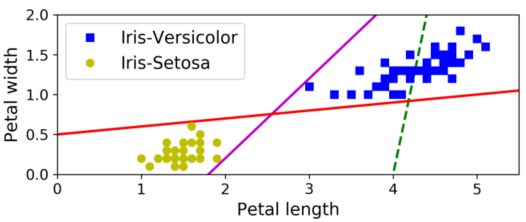

Considere agora o exemplo abaixo. Neste caso, o plano de separação é obtido de modo a deixar uma **margem de separação** entre ele e os pontos mais próximos de cada uma das classes.

Este é o objetivo de uma SVM com margem rígida, obter um plano de separação que separe totalmente os dados e que esteja o mais afastado deles possível.

Os pontos mais próximos do plano de separação são chamados de **vetores de suporte**

**Obs.:** Por enquanto, vamos assumir que **não** existem pontos que esteja do lado 'errado' da fronteira de separação.

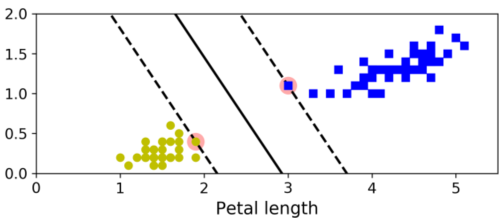

##1.1) Obtenção da Margem Rígida

Na obtenção de um critério de classificação usando o perceptron, vimos:

Dado um vetor $\mathbf{w}$ **normal** à fronteira de separação, temos que:

- Se $\mathbf{x}_i \cdot \mathbf{w} + b  < 0$, então $y_i = 0$;

- Se $\mathbf{x}_i \cdot \mathbf{w} + b \geq 0$, então $y_i = 1$.

Para as SVM's é mais conveniente se as classes estiverem dadas como $-1$ e $+1$ e não como $0$ e $1$. Então, vamos fazer essa alteração:

- Se $\mathbf{x}_i \cdot \mathbf{w} + b  < 0$, então $y_i = -1$;

- Se $\mathbf{x}_i \cdot \mathbf{w} + b \geq 0$, então $y_i = 1$.

Uma vantagem é que agora podemos escrever um único critério:

$$
\boxed{y_i(\mathbf{x}_i \cdot \mathbf{w} + b) \geq 0}
$$

Considere um ponto $\mathbf{x}_a$ qualquer, localizado (por exemplo), no lado positivo. Como ilustrado na figura abaixo, vamos denominar de $r$ a distância entre $\mathbf{x}_a$ e a fronteira de separação e $\mathbf{x}'_a$ a projeção ortogonal do ponto sobre a fronteira

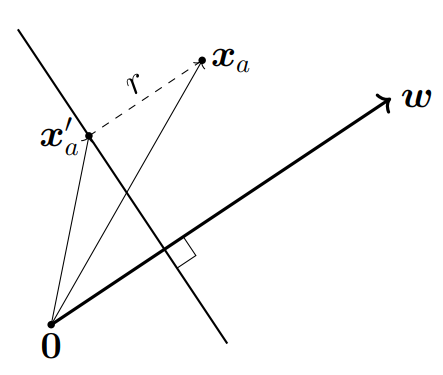

Como $\mathbf{w}$ é normal ao plano de separação, os vetores $\mathbf{w}$ e $(\mathbf{x}_a - \mathbf{x}'_a)$ devem ser paralelos (possuem a mesma direção).

Podemos concluir que o vetor $\mathbf{w}$ pode ser escrito como o vetor $(\mathbf{x}_a - \mathbf{x}'_a)$ *multiplicado* por alguma escala. Para facilitar, vamos **normalizar** o vetor $\mathbf{w}$, definindo o vetor unitário $\hat{\mathbf{w}}$:
$$
\hat{\mathbf{w}} = \frac{\mathbf{w}}{||\mathbf{w}||}
$$

Neste caso, o fator de escala entre $(\mathbf{x}_a - \mathbf{x}'_a)$ e $\hat{\mathbf{w}}$ vai ser a própria distância $r$:
$$
(\mathbf{x}_a - \mathbf{x}'_a) = r \frac{\mathbf{w}}{||\mathbf{w}||} \qquad \qquad \rightarrow \qquad \qquad \mathbf{x}'_a =  \mathbf{x}_a - r \frac{\mathbf{w}}{||\mathbf{w}||}
$$



---

$\dfrac{\mathbf{w}}{||\mathbf{w}||}  \qquad \rightarrow \qquad $ direção

$r \qquad \rightarrow \qquad$ distância entre $\mathbf{x}_a$ e  $\mathbf{x}'_a$


---




**Objetivo:** Encontrar o maior valor de $r$ possível que garanta:

1) que **todos** os pontos estejam classificados corretamente;

2) que todos os pontos estejam a uma distância de pelo menos $r$ do plano de separação:

$$
y_i(\mathbf{x}_i \cdot \mathbf{w} + b) \geq r
$$

Como $r$, $b$ e $\mathbf{w}$ são parâmetros a serem determinados, podemos assumir o seguinte para facilitar os cálculos:

*Hipótese:* Será assumida uma escala arbitrária para os dados, de modo que a distância entre o plano de separação e o ponto mais próximo ($\mathbf{x}_a)$ é de 1 unidade:

$$
\mathbf{x}_a \cdot \mathbf{w} + b = 1
$$


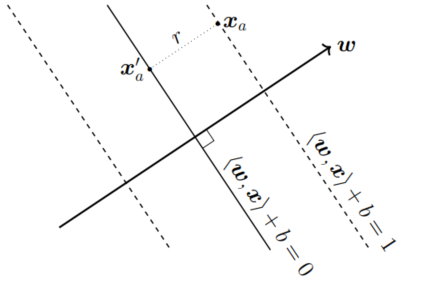

Como o ponto $\mathbf{x}'_a$ está sobre o plano de separação:


$$
y_i(\mathbf{x}'_a \cdot \mathbf{w} + b) = 0 \qquad → \qquad \mathbf{x}'_a \cdot \mathbf{w} + b = 0
$$

Usando a expressão obtida anteriormente para $\mathbf{x}'_a$:
$$
\mathbf{w} \cdot \left(\mathbf{x}_a - r \frac{\mathbf{w}}{||\mathbf{w}||}  \right) + b = 0 \qquad → \qquad \mathbf{w} \cdot \mathbf{x}_a + b - r \dfrac{\mathbf{w} \cdot \mathbf{w}}{||\mathbf{w}||} = 0
$$

Como definimos anteriormente que $\mathbf{w} \cdot \mathbf{x}_a + b = 1$ e $\mathbf{w} \cdot \mathbf{w} = ||\mathbf{w}||^2$, obtemos que:

$$
\boxed{r = \dfrac{1}{||\mathbf{w}||}}
$$







---


**Problema de Otimização:**

*Obtenção da margem* : Dado um conjunto $T = (\mathbf{x_1}, y_1), (\mathbf{x_2}, y_2), \ldots (\mathbf{x}_N, y_N)$, deve-se encontrar $\mathbf{w}$ e $b$ tal que a variável $r = 1/||\mathbf{w}||$ seja maximizada considerando as restrições $y_i (\mathbf{w} \cdot \mathbf{x_i} + b) \geq 1$ para $i=1,2,3,\ldots, N$:


\begin{equation}
\max_{\mathbf{w},b} \frac{1}{||\mathbf{w}||} , \,\,\qquad
\textrm{sujeito a} \qquad  y_i (\mathbf{w} \cdot \mathbf{x_i} + b) \geq 1, \qquad i=1,2,3,\ldots, N.
\end{equation}



---



Para aplicar os algoritmos de otimização, usualmente é mais simples buscar um ponto  de **mínimo** e não de máximo. Uma maneira mais conveniente de escrever o problema de otimização é a seguinte:


\begin{equation}
\min_{\mathbf{w},b} \dfrac{1}{2} ||\mathbf{w}||^2 , \,\,\qquad
\textrm{sujeito a} \qquad  y_i (\mathbf{w} \cdot \mathbf{x_i} + b) -1 \geq 0, \qquad i=1,2,3,\ldots, N.
\end{equation}

*Obs.:* A constante $1/2$ é adicionada para deixar a expressão para o gradiente de $\mathbf{w}$ mais simples!

Como temos uma desigualdade envolvendo termos não-lineares, precisamos utilizar técnicas de **programação não-linear** para resolução do problema.

##1.2) Problema de Otimização

Para resolver este problema de otimização, precisamos de duas ferramentas:

1) Multiplicadores de Lagrange para inserir a restrição

2) Gradiente descendente para obter o ponto de mínimo



###1.2.1) Multiplicadores de Lagrange

**Objetivo**: Transformar o problema de otimização com restrição em um problema sem restrição.

Vamos inserir a restrição na função objetivo utilizando um *multiplicador de Lagrange* $\alpha_i \geq 0$:

$$
L(\mathbf{w}, b, \alpha_i) = \frac{1}{2} \|\mathbf{w}\|^2 - \sum_{i=1}^{N} \alpha_i \left( y_i (\mathbf{w} \cdot \mathbf{x}_i + b) - 1 \right)
$$

Precisamos agora encontrar $\mathbf{w}, b$ e  $\alpha_i$ que minimizem esta função.


O ponto de ótimo deste problema deve satisfazer as condições de Karush-Kuhn-Tucker:

1)  **Condição de estacionaridade**:

*Gradiente em relação a $\mathbf{w}$ nulo*:

$$
\dfrac{\partial L}{\partial \mathbf{w}} = \mathbf{w} - \sum\limits_{i=1}^N \alpha_i y_i \mathbf{x}_i = 0\qquad \rightarrow \qquad \mathbf{w} = \sum\limits_{i=1}^N \alpha_i y_i \mathbf{x}_i
$$

*Derivada em relação a b nula*:

$$
\dfrac{\partial L}{\partial b}  = \sum\limits_{i=1}^N \alpha_i y_i = 0
$$

2) **Condição de Complementaridade**

Para todos os pontos $i$:

$$
\alpha_i \left( y_i (\mathbf{w} \cdot \mathbf{x}_i + b) - 1 \right) = 0
$$




---



**Obs.:** Neste formato, este problema de otimização é chamado de **formulação primal** para as SVM's.  



---




###1.2.2) Gradiente Descendente


Este método de otimização busca o *ponto de mínimo* de uma função seguindo a direção (oposta) à indicada pelo gradiente.

Para uma função qualquer $F(\mathbf{x}$), parte-se de um chute inicial $\mathbf{x}_0$ para os parâmetros e realiza-se um processo iterativo da forma:

$$
\mathbf{x}_{n+1} = \mathbf{x}_n - \gamma \nabla F(\mathbf{x}_n)
$$
onde $\gamma$ é a taxa de aprendizagem.

Para o problema anterior, os parâmetros podem ser atualizados como:
$$
\mathbf{w} \leftarrow \mathbf{w} - \gamma \left( \mathbf{w} - \sum_{i=1}^{n} \alpha_i y_i \mathbf{x}_i \right)
$$

$$
b \leftarrow b - \gamma \left( \sum_{i=1}^{n} \alpha_i y_i \right)
$$

$$
\alpha_i \leftarrow \alpha_i - \gamma \left( y_i \left(  \mathbf{w} \cdot \mathbf{x}_i   + b \right) - 1 \right)
$$


Na última expressão, foi considerado que:
$$
\dfrac{\partial F}{\partial \alpha_i} =  y_i \left(  \mathbf{w} \cdot \mathbf{x}_i   + b \right) - 1
$$

Este processo pode então ser repetido um certo número limite de iterações ou até um critério de convergência ser obtido.



---


##Implementação do Código - SVM com Margem Rígida

---



In [ ]:
import numpy as np

#Máquinas de Vetores de Suporte com Margem Rígida
class HardMarginSVM:
  #Inicializando os parâmetro
  #1) learning_rate (taxa de aprendizagem): valor pequeno para garantir estabilidade!
  #2) epochs: número máximo de épocas (critério de parada)
  #3) epsilon: precisão para parar o processo de otimização se já atingiu convergência
    def __init__(self, learning_rate=0.01, epochs=1000, epsilon=1e-8):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.epsilon = epsilon

    def fit(self, X, y):
        #Número de amostas e número de atributos
        self.num_samples, self.num_features = X.shape

        #Inicializando os parâmetros com valores nulos e com dimensão correta
        self.w = np.zeros(self.num_features)
        self.b = 0
        self.alpha = np.zeros(self.num_samples)

        #Loop principal: repetir pelo número máximo de épocas especificado ou até a precisão ser obtida
        for _ in range(self.epochs):
            # Inicializando os gradientes, com valores nulos também
            dw = np.zeros(self.num_features)
            db = 0
            d_alpha = np.zeros(self.num_samples)

            # Calculando os somatórios e o termo de atualização do alpha (para cada amostra)
            for i in range(self.num_samples):
                dw += self.alpha[i] * y[i] * X[i] #Somatório que aparece no gradiente de w
                db += self.alpha[i] * y[i] #Somatório que aparece na derivada de b
                d_alpha[i] = y[i] * (np.dot(self.w, X[i]) + self.b) - 1 #Atualização do alpha_i

            # Atualiando os parêmetros usando a expressão do gradiente descendente
            new_w = self.w - self.learning_rate *(self.w - dw)
            new_b = self.b - self.learning_rate * db
            new_alpha = self.alpha - self.learning_rate * d_alpha

            # Checando se a diferença entre os valores novos e os antigos é menor que a precisão
            if (np.linalg.norm(new_w - self.w) < self.epsilon and    #Como w é vetor, utilizando a norma como critério de convergência
                abs(new_b - self.b) < self.epsilon and
                np.all(np.abs(new_alpha - self.alpha) < self.epsilon)):  #np.all para fazer o teste sobre todos os elementos de alpha
                print("Convergência atingida!!")
                break

            # Atualizando os parâmetros para repetir o loop
            self.w = new_w
            self.b = new_b
            self.alpha = np.maximum(0, new_alpha) #Garantindo que o parâmetro não seja negativo!

    #Método para determinar a classe de uma amostra
    def predict(self, X):
        hyper_plane = np.dot(X, self.w) + self.b #Plano de separação definido pelos parâmetros
        return np.where(hyper_plane > 0, 1, -1) #Lad positivo = classe 1, lado negativo = classe -1


In [ ]:
# Exemplo simples de uso
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Gerando dados aleatórios
seed = 555#Exemplos: 555- bem dividido
X, y = make_blobs(n_samples=100, n_features=2,centers=2, random_state=seed)

#Definindo as classes 0 como -1 para manter o padrão do SVM
y = np.where(y == 0, -1, 1)

#Divisão teste/treinamento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

#Usando a classe definida
svm = HardMarginSVM(learning_rate=0.01, epochs=1000, epsilon=1e-8)
svm.fit(X_train, y_train)

#Predizendo os valores para o grupo de teste
pred = svm.predict(X_test)
acc = accuracy_score(y_test, pred)
print('Acurácia = ', acc)

Acurácia =  1.0


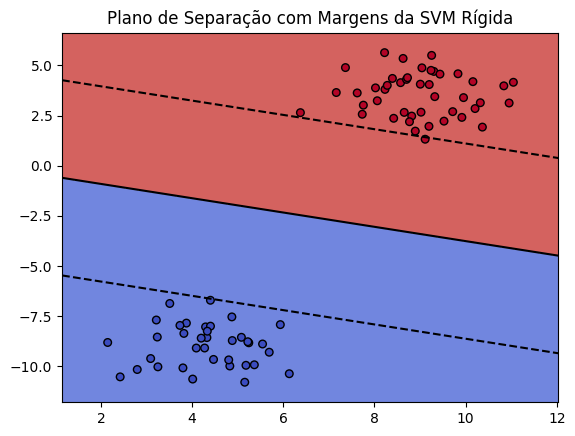

In [ ]:
#Plotando os dados, o plano de separação e as margins
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(X, y, model):
    # Criando um grid de pontos que cobrem o espaço dos atributos
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Classificando todos os pontos no grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Desenhando o plano de decisão
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

    # Desenhando os dados de treinamento
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors='k', cmap=plt.cm.coolwarm)

    # Desenhando o hiperplano de separação
    w = model.w
    b = model.b
    x_hyper = np.linspace(x_min, x_max, 100)

    # Resolvendondo para y no hiperplano e nas margens
    y_hyper = -(w[0] * x_hyper + b) / w[1]  # Hiperplano central
    margin = 1 / np.linalg.norm(w)           # Distância da margem

    # Margens superior e inferior
    y_margin_up = -(w[0] * x_hyper + b - 1) / w[1]
    y_margin_down = -(w[0] * x_hyper + b + 1) / w[1]

    # Desenha o hiperplano e as margens
    plt.plot(x_hyper, y_hyper, 'k-', label='Hiperplano de Separação')
    plt.plot(x_hyper, y_margin_up, 'k--', label='Margem +1')
    plt.plot(x_hyper, y_margin_down, 'k--', label='Margem -1')

    # Configurações visuais
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
   #plt.legend()
    plt.title('Plano de Separação com Margens da SVM Rígida')
    plt.show()

# Chamando a função de plot com margens
plot_decision_boundary(X_train, y_train, svm)


#2) SVM com Margem Suave



O SVM com margem rígida funciona bem quando os dados estão linearmente separados, mas ele não é capaz de lidar com outliers. Considere os dois exemplos abaixo:

1) No primeiro, o outlier localizado no meio dos outros pontos torna a classificação impossível

2) No segundo, a margem obtida está deslocada por conta da presença de um outlier

Antes de abordarmos como resolver este problema, vamos definir dois conceitos fundamentais na área e aprendizagem de máquina que são o **sobreajuste** e a **regularização**.

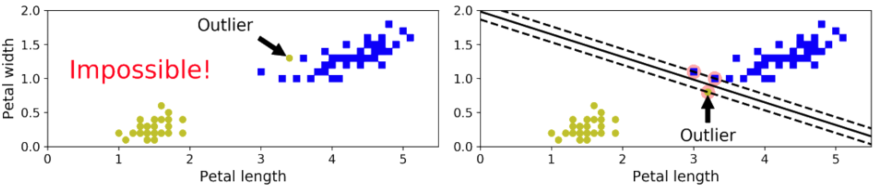

##2.1) Sobreajuste e Regularização

Em dados reais, é comum que existam ruídos e outliers. Se ajustarmos os parâmetros de modo a representar **exatamente** todos os dados do conjunto de treinamento, podemos acabar com a seguinte situação:

- O modelo consegue se ajustar perfeitamente aos dados de treinamento (erro empírico baixo)

- O modelo **não** consegue prever adequadamente o comportamento de novos dados (erro esperado alto, sem capacidade de generalização)

Este cenário é chamado de **sobreajuste** e pode ser contornado utilizando técnicas de **regularização**. As figuras a seguir mostram exemplos de sobreajuste em modelos de classificação e regressão.


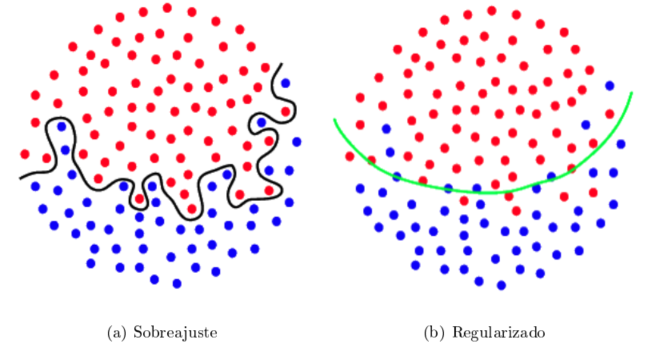

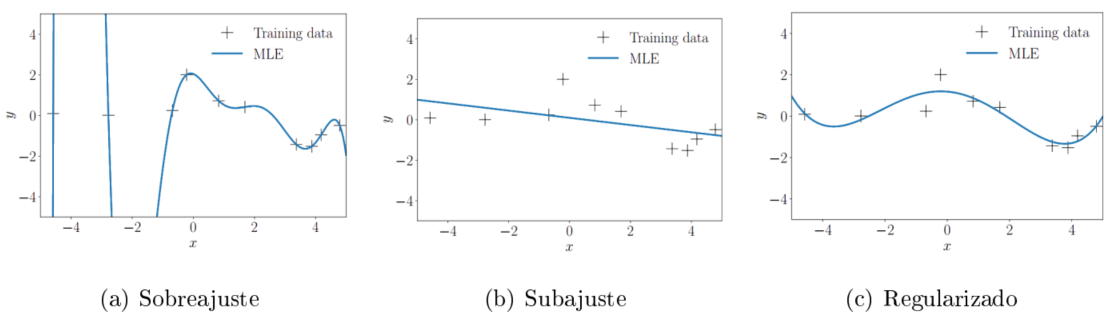

##2.1.1) Estratégia de Regularização

*Regularização* são estratégias de redução de sobreajuste que, de modo geral, adicionam uma penalidade à função de perda que está sendo minimizada durante o ajuste dos parâmetros.

Na aula passada, vimos que uma *função preditora* pode ser expressa da forma:

$$
f(\mathbf{x}_i, \mathbf{\theta}) \approx y_i \qquad \qquad i =1,2,3, \ldots , N
$$

e durante o treinamento do modelo, buscamos parâmetros $\theta$ de modo a minimizar o erro empírico:

$$
\min_{\mathbf{\theta}} \,  \mathbf{R}_{emp} (f, \mathbf{X}_{treino}, \mathbf{y}_{treino} )
$$

A ideia de regularização é adicionar um termo ao risco empírico que irá penalizar a função no caso de sobreajuste.


Por exemplo, a **regularização L2** (também chamada de *ridge*) adiciona um termo que penaliza a função com base na magnitude dos parâmetros:

$$
\min_{\mathbf{\theta}} \,  \mathbf{R}_{emp} (f, \mathbf{X}_{treino}, \mathbf{y}_{treino}  + \lambda ||\theta||^2)
$$

onde $\lambda$ é um *hiperparâmetro* chamado de **parâmetro de regularização**. O objetivo é diminuir o peso dos parâmetros no ajuste dos dados, levando a modelos *mais simples*.



##2.2) Obtenção de uma Margem Suave para SVM's

As **SVM com margem suavem** são uma extensão das SVM com margem rígida que permite que alguns pontos estejam 'do lado errado' do plano de separação, reduzindo assim o sobreajuste.

A abordagem mais simples para obtenção da margem suave é a introdução de uma **variável de folga**, que será discutido a seguir.


###2.2.1) Utilização de uma Variável de Folga

A variável de folga (*slack variable*) $\xi_i$ é uma variável que será atribuída para cada ponto do conjunto de treinamento da seguinte forma:

i) Se o ponto estiver classificado de forma correta e fora da **margem de separação**, será atribuído o valor 0.

*Obs.:* as margens de separação são as linhas que passam pelos vetores de suporte (pontos mais próximos do plano de separação na formulação com margem rígida)

ii) Se o ponto estiver classificado de forma errada **ou** se estiver classificado de forma certa mas entre o plano e a margem de separação, irá receber como valor a distância do ponto até a margem do lado correto.

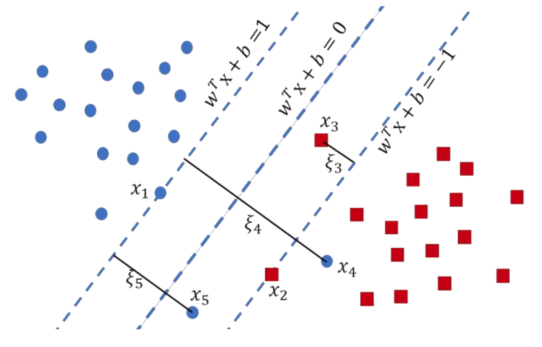

Anteriormente, vimos que a margem rígida foi obtida resolvendo o problema:


\begin{equation}
\min_{\mathbf{w},b} \dfrac{1}{2} ||\mathbf{w}||^2 , \,\,\qquad
\textrm{sujeito a} \qquad  y_i (\mathbf{w} \cdot \mathbf{x_i} + b) -1 \geq 0, \qquad i=1,2,3,\ldots, N.
\end{equation}


A formulação com margem rígida não permite pontos classificados de forma errada pois impõe estritamente que:

$$
y_i (\mathbf{w} \cdot \mathbf{x_i} + b) \geq 1
$$

Agora, vamos 'permitir' que os pontos estejam no lado errado, definindo que

$$
y_i (\mathbf{w} \cdot \mathbf{x_i} + b) \geq 1 - \xi_i
$$

Agora, para evitar que os valores de $\xi_i$ sejam muito elevados, vamos adicionar um termo de regulariação na função objetivo, reescrevendo o problema de otimização como:

\begin{equation}
\min_{\mathbf{w},b,\xi_i} \dfrac{1}{2} ||\mathbf{w}||^2  + C \sum\limits_{i=1}^N \xi_i, \,\,\qquad
\textrm{sujeito a} \qquad  y_i (\mathbf{w} \cdot \mathbf{x_i} + b) -(1 - \xi_i) \geq 0, \qquad \textrm{e} \qquad \xi_i \geq 0 \qquad i=1,2,3,\ldots, m.
\end{equation}

onde $C$ será o parâmetro de regularização. Este parâmetro irá afetar o resultado da seguinte forma:

i) Se $C$ for um valor pequeno, o impacto das variáveis de folga na penalização será reduzido, permitindo a obtenção de uma margem mais larga (com mais pontos dentro da margem ou classificados de forma errada)

ii) Se $C$ for um valor grande, será obtida uma margem mais estreita, se aproximando da formulação com margem rígida



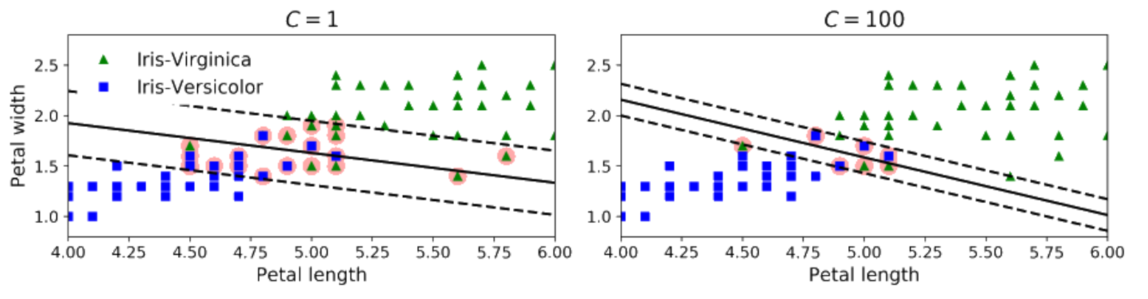

##2.2.2) Obtenção dos Parâmetros para Margem Suave

Para encontrar os parâmetros com a margem suave, precisamos primeiramente reescrever a função de Lagrange para incluir os novos termos e a nova restrição ($\xi_i \geq 0$):

$$
L(\mathbf{w}, b, \xi, \alpha, \gamma) = \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{n} \xi_i - \sum_{i=1}^{n} \alpha_i \left[ y_i \left(  \mathbf{w} \cdot \mathbf{x}_i  + b \right) - 1 + \xi_i \right] - \sum\limits_{i=1}^N \gamma_i \xi_i
$$

Neste caso, temos dois multiplicadores de Lagrange para cada ponto: $\alpha_i$ e $\gamma_i$.

A partir desta relação, o gradiente descendente pode ser aplicado para minimizar a função objetivo.



---



A seguir é mostrada a implementação de uma SVM com margem suave usando a função LinearSVC do sklearn.

##Implementação

Acurácia =  0.9611111111111111


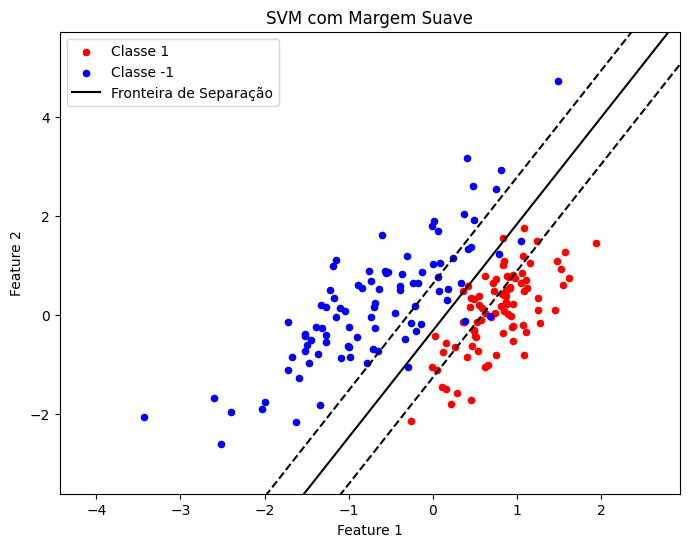

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Gerando dados de teste com make_classification
seed = 42 #Exemplos: 12 - caso com outlier, 88 - Sem separação linear, 42 - Mais aleatório
X, y = make_classification(n_samples=600, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=seed)

# Convertendo as classes de 0 para -1 (SVM utiliza -1 e 1)
y = np.where(y == 0, -1, 1)

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Normalizando os dados
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# Treinando uma SVM com margem suave usando LinearSVC
#C muito elevado se aproxima de hard SVM - a partir de um certo ponto não influencia mais!
#C muito pequeno penaliza menos os dados errados -> maior margens
model = LinearSVC(C=100, max_iter=1000)
model.fit(X_train_norm, y_train)

# Predizendo as classes
y_pred = model.predict(X_test_norm)

# Calculando a acurácia
accuracy = accuracy_score(y_test, y_pred)
print('Acurácia = ', accuracy )

##########################################################################################

# Função para ploatar as fronteiras de decisão e margens
def plot_svm_decision_boundary(X, y, model):
    plt.figure(figsize=(8, 6))

    # Plotando os pontos de dados
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c ='r', s=20 , label='Classe 1')
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], c ='b', s=20, label='Classe -1')

    # Extraindo o coeficiente e o intercepto do modelo
    w = model.coef_[0]
    b = model.intercept_[0]

    # Definindo os limites do gráfico
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx = np.linspace(x_min, x_max, 100)

    # Fronteira de decisão: w1*x1 + w2*x2 + b = 0  => x2 = -(w1/w2) * x1 - b/w2
    decision_boundary = -(w[0] / w[1]) * xx - b / w[1]

    # Margens paralelas: w1*x1 + w2*x2 + b = +/- 1 => x2 = -(w1/w2) * x1 - (b +/- 1)/w2
    margin_up = -(w[0] / w[1]) * xx - (b - 1) / w[1]
    margin_down = -(w[0] / w[1]) * xx - (b + 1) / w[1]

    # Plotando a fronteira de decisão e as margens
    plt.plot(xx, decision_boundary, 'k-', label='Fronteira de Separação')
    plt.plot(xx, margin_up, 'k--')
    plt.plot(xx, margin_down, 'k--')

    # Ajustando os limites do gráfico
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM com Margem Suave')
    plt.legend()
    plt.show()

# Chamando a função para plotar a fronteira de decisão e as margens
plot_svm_decision_boundary(X_test_norm, y_test, model)


#3) SVM Não-Lineares

As SVM com margem suave podem lidar com a presença de ruído/outliers, mas não são capazes de classificar dados que não sejam linearmente separáveis.



##3.1)Formulação Dual



Anteriormente, vimos que a função lagrangiana, considerando a abordagem com margem suave, é dada por:

$$
L(\mathbf{w}, b, \xi, \alpha, \gamma) = \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^{n} \xi_i - \sum_{i=1}^{n} \alpha_i \left[ y_i \left(  \mathbf{w} \cdot \mathbf{x}_i  + b \right) - 1 + \xi_i \right] - \sum\limits_{i=1}^N \gamma_i \xi_i
$$

Nosso interesse é obter o ponto de mínimo desta função, onde as derivadas são nulas. Avaliando as derivadas em relação às variáveis a serem otimizadas:

$$
\frac{\partial L}{\partial \mathbf{w}} = \mathbf{w} - \sum_{i=1}^{N} \alpha_i y_i \mathbf{x}_i  = 0
$$
$$
\frac{\partial L}{\partial b} = - \sum_{i=1}^{N} \alpha_i y_i  = 0
$$
$$
\frac{\partial L}{\partial \xi_i} = C - \alpha_i - \gamma_i = 0
$$

Podemos usar a primeira relação para obter uma expressão para $\mathbf{w}$ em função das outras variáveis e substituí-la no Lagrangiano, obtendo:

$$
L(b, \xi, \alpha, \gamma)  = \dfrac{1}{2} \sum\limits_{i=1}^N \sum\limits_{j=1}^N y_i y_j \alpha_i \alpha_j (\mathbf{x}_i \cdot \mathbf{x}_j) + C \sum\limits_{i-1}^N \xi_i -  \sum_{i=1}^N y_i \alpha_i \left(\sum\limits_{j=1}^N y_j \alpha_j \mathbf{x}_j \right )\cdot \mathbf{x}_i - b \sum\limits_{i=1}^N y_i \alpha_i + \sum\limits_{i=1}^N \alpha_i - \sum\limits_{i=1}^N \alpha_i \xi_i - \sum\limits_{i=1}^N\gamma_i \xi_i
$$

Como o produto escalar é um operador linear, podemos reescrever o seguinte termo:
$$
\sum_{i=1}^N y_i \alpha_i \left(\sum\limits_{j=1}^N y_j \alpha_j \mathbf{x}_j \right )\cdot \mathbf{x}_i  = \sum\limits_{i=1}^N \sum\limits_{j=1}^N y_i y_j \alpha_i \alpha_j (\mathbf{x}_i \cdot \mathbf{x}_j)
$$
o que permite colocar em evidência com o primeiro termo. Simplificando e colocando em evidência $\xi_i$, obtemos que:

$$
L(b, \xi, \alpha, \gamma)  = - \dfrac{1}{2} \sum\limits_{i=1}^N \sum\limits_{j=1}^N y_i y_j \alpha_i \alpha_j (\mathbf{x}_i \cdot \mathbf{x}_j)   - b \sum\limits_{i=1}^N y_i \alpha_i + \sum\limits_{i=1}^N \alpha_i + \sum\limits_{i=1}^N(C - \alpha_i -\gamma_i) \xi_i
$$

Pelos critérios de derivadas nulas vistos anteriormente, sabemos que o somatório que multiplica $b$ é nulo. Da mesma forma, o termo que multiplica $\xi_i$ no último somatório também é nulo, resultando em:

$$
L(\alpha)  = - \dfrac{1}{2} \sum\limits_{i=1}^N \sum\limits_{j=1}^N y_i y_j \alpha_i \alpha_j (\mathbf{x}_i \cdot \mathbf{x}_j)  + \sum\limits_{i=1}^N \alpha_i
$$

Com isso, obtemos uma função como somente um parâmetro $\alpha$ a ser otimizado.

Pela restrição que usamos de que $C - \alpha_i - \gamma_i = 0$, podemos ainda dizer que  $C - \alpha_i = \gamma_i$. Como os multiplicadores de Lagrange são positivos, isso implica que $C - \alpha_i \geq 0$, ou ainda, $\alpha_i \leq C$. Como $\alpha_i$ também deve ser positivo, temos que:
$$
0 \leq \alpha_i \leq C
$$

Dessa forma, o problema de otimização a ser resolvido pode ser posto como:
\begin{equation}
\min_{\alpha} \,\,\left(  - \dfrac{1}{2} \sum\limits_{i=1}^N \sum\limits_{j=1}^N y_i y_j \alpha_i \alpha_j (\mathbf{x}_i \cdot \mathbf{x}_j)  + \sum\limits_{i=1}^N \alpha_i, \right)  \,\,\qquad
\textrm{sujeito a} \qquad   \sum_{i=1}^{N} \alpha_i y_i  = 0 \qquad \textrm{e} \qquad 0 \leq \alpha_i \leq C \qquad i=1,2,3,\ldots, N.
\end{equation}

Esta forma do problema de otimização é chamada de **forma dual** e, de modo geral, costuma ser mais fácil de ser resolvida.



---

Com os valores de $\alpha_i$ determinados, é possivel obter $\mathbf{w}$:
$$
 \mathbf{w} = \sum_{i=1}^{N} \alpha_i y_i \mathbf{x}_i
$$

Para obter $b$, podemose utilizar os vetores de suporte. Por definição, neste caso temos que $y_i(\mathbf{w}\cdot \mathbf{x}_i + b) = 1$. Com este ponto identificado e $\mathbf{w}$ determinado, pode-se calcular o valor de $b$.



##3.2) Mapeamento em Dimensões Maiores



Quando os dados não são linearmente separáveis, podemos tentar torná-los linearmente separáveis em um espaço de dimensão maior.

Considere um conjunto de dados com $D$ atributos. Nesse caso, a fronteira linear de separação precisa ser definida em um espaço de dimensão $D$. Caso os dados não forem linearmente separáveis, podemos tentar o seguint:

1) Definir um (ou mais) atributo adicional ao conjunto de dados que consiste em **operações não-lineares** dos atributos já existentes. Com isso, os pontos passam a ser definidos em um espaço de dimensão $D+1$;

2) Buscar uma fronteira de separação linear no espaço de dimensão $D+1$. Essa ideia é ilustrada nas figuras a seguir para um espaços de dimensão $1$ e $2$.

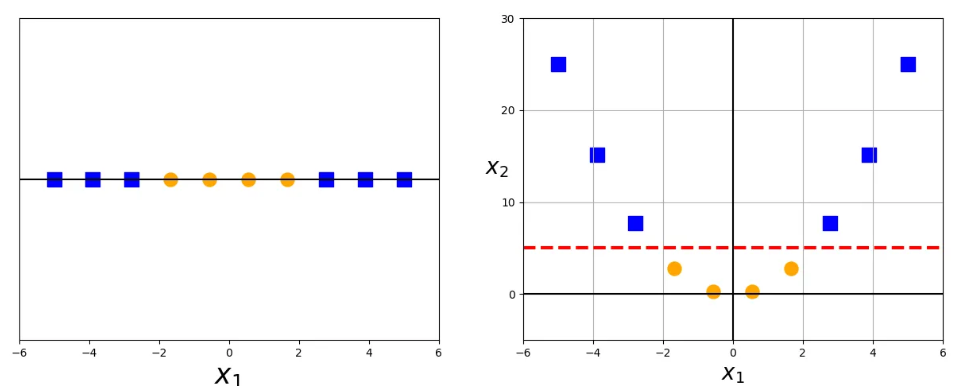

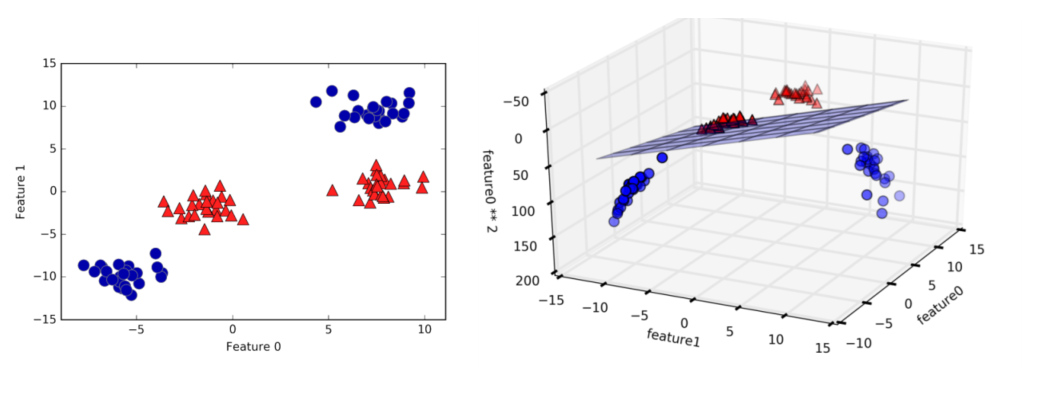

Para criar estes novos atributos, podemos definir um operador $\phi(\mathbf{x}_i)$, que mapeia os atributos do espaço original de dimensão $D$ para um espaço maior.

Por exemplo, nas figuras acima, no primeiro caso, teríamos algo da forma:

$$
\phi(\mathbf{x}_i) = \phi(x_{1,i}) = (x_{1,i}, x_{1,i}^2)
$$

No segundo exemplo, também foi criado um novo atributo elevando um dos originais ao quadrado:

$$
\phi(\mathbf{x}_i) = \phi(x_{1,i}, x_{2,i}) = (x_{1,i}, x_{2,i}, x_{1,i}^2)
$$

Usando esta abordagem, o problema de otimização dual pode ser expresso como:

\begin{equation}
\min_{\alpha} \,\,\left(  - \dfrac{1}{2} \sum\limits_{i=1}^N \sum\limits_{j=1}^N y_i y_j \alpha_i \alpha_j (\phi(\mathbf{x}_i) \cdot \phi(\mathbf{x}_j))  + \sum\limits_{i=1}^N \alpha_i, \right)  \,\,\qquad
\textrm{sujeito a} \qquad   \sum_{i=1}^{N} \alpha_i y_i  = 0 \qquad \textrm{e} \qquad 0 \leq \alpha_i \leq C \qquad i=1,2,3,\ldots, N.
\end{equation}


Esta abordagem equivale a resolver o SVM com margem suave em um espaço com dimensão maior que o original.


##3.3) Truque do Kernel (*kernel trick*)

Do ponto de vista prático, nem sempre é fácil supor um formato para $\phi(\mathbf{x}_i$) que irá permitir uma separação, além de não ser computacionalmente eficiente determinar os novos atributos e depois calcular o produto escalar.

Para resolver isso, podemos introduzir uma **função kernel** $k(\mathbf{x}_i, \mathbf{x}_j)$. Usando como base o **Teorema de Mercer**, podemos definir estas funções de forma que

$$
k(\mathbf{x}_i, \mathbf{x}_j)  = \phi(\mathbf{x}_i) \cdot \phi(\mathbf{x}_j)
$$

Computacionalmente, é muito mais simples calcular diretamente o lado esquerdo do que o lado direito.

Com isso, o problema de otimização pode ser ainda reescrito como:

\begin{equation}
\min_{\alpha} \,\,\left(  - \dfrac{1}{2} \sum\limits_{i=1}^N \sum\limits_{j=1}^N y_i y_j \alpha_i \alpha_j k(\mathbf{x}_i, \mathbf{x}_j)  + \sum\limits_{i=1}^N \alpha_i, \right)  \,\,\qquad
\textrm{sujeito a} \qquad   \sum_{i=1}^{N} \alpha_i y_i  = 0 \qquad \textrm{e} \qquad 0 \leq \alpha_i \leq C \qquad i=1,2,3,\ldots, N.
\end{equation}





Alguns dos kernels mais utilizados são os seguintes:

1) Linear: corresponde à formulação original das SVM

$$
k(\mathbf{x}_i, \mathbf{x}_j) = \mathbf{x}_i \cdot \mathbf{x}_j
$$


2) Polinomial:

$$
k(\mathbf{x}_i, \mathbf{x}_j) = (\gamma(\mathbf{x}_i \cdot \mathbf{x}_j) + c)^d
$$
onde $\gamma$, $c$ e $d$ são parâmetros especificados pelo usuário (hiperparâmetros)

3) *Radial Basis Funcion* (RBF):

$$
k(\mathbf{x}_i, \mathbf{x}_j) = \exp\left(-\gamma \|\mathbf{x}_i - \mathbf{x}_j\|^2\right)
$$
onde $\gamma\geq 0$ deve ser definido

4) Sigmoidal

$$
k(\mathbf{x}_i, \mathbf{x}_j) = \tanh(\gamma (\mathbf{x}_i \cdot \mathbf{x}_j) + r)
$$
onde $\gamma$ e $r$ devem ser definidos.




---

Uma demonstração de utilização de SVM com kernel não-linear é apresentada abaixo.


##Implementação

Acurácia =  0.9966666666666667


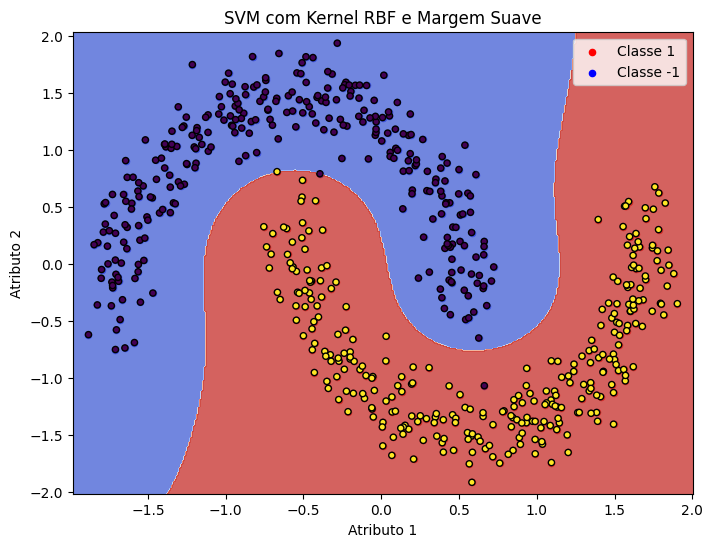

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.datasets import make_moons #Gera dataset com fronteira de separação não linear bem visíveis
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Gerando dados de teste com make_classification
seed = 42
X, y = make_moons(n_samples = 2000, noise=0.1, random_state=seed) #Gerando dados para ilustar caso onde SVM não-linear vai desempenhar bem

# Convertendo as classes de 0 para -1 (SVM utiliza -1 e 1)
y = np.where(y == 0, -1, 1)

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Normalizando os dados
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# Treinando uma SVM com kernel RBF e margem suave
kernel = 'rbf'  #ver https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html para os possíveis kernels
C = 1 #Parâmetro de regularização
gamma = 1 #Parâmetro de controle do kernel. Se definido como 'scale' irá ajustar automaticamente

model = SVC(kernel=kernel, C=C, gamma=gamma)
model.fit(X_train_norm, y_train)

# Predizendo as classes
y_pred = model.predict(X_test_norm)

# Calculando a acurácia
accuracy = accuracy_score(y_test, y_pred)
print('Acurácia = ', accuracy)

##########################################################################################

# Função para plotar as fronteiras de decisão e margens
def plot_svm_decision_boundary(X, y, model):
    plt.figure(figsize=(8, 6))

    # Plotando os pontos de dados
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='r', s=20, label='Classe 1')
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], c='b', s=20, label='Classe -1')

    # Definindo os limites do gráfico
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 400), np.linspace(y_min, y_max, 400))

    # Fazendo previsões para cada ponto da malha de coordenadas
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plotando a fronteira de decisão
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

    # Plotando os pontos de dados
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=20)
    plt.xlabel('Atributo 1')
    plt.ylabel('Atributo 2')
    plt.title('SVM com Kernel RBF e Margem Suave')
    plt.legend()
    plt.show()

# Chamando a função para plotar a fronteira de decisão e as margens
plot_svm_decision_boundary(X_test_norm, y_test, model)
